# Preprocessing on [Used Car Price Data](https://www.kaggle.com/avikasliwal/used-cars-price-prediction)

### Standard Imports

In [311]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [312]:
df = pd.read_csv("data/train-data.csv")
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [313]:
df.shape

(6019, 14)

In [314]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [315]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


##  Impute the missing values using the median (for numerical variable).

In [316]:
df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

#### HERE the only numerical missing variable is  Seats, so filling it with the median value

In [317]:
df['Seats'].fillna(value= df.Seats.median(), inplace=True)

In [318]:
df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                   0
New_Price            5195
Price                   0
dtype: int64

In [319]:
#Dropping reduntat columns
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## Converting variables like - Mileage, Engine and Power into Numerical variables.

In [320]:
non_var =  ['Mileage', 'Engine', 'Power', 'New_Price']
for column in non_var:
    units_list = []
    for index, row in df.iterrows():
        f =  row[column]
        if type(f)== str:
            units_list.append(f.split()[1])
    f = np.array(units_list)
    print(f" {column} : {np.unique(f)}")


   

 Mileage : ['km/kg' 'kmpl']
 Engine : ['CC']
 Power : ['bhp']
 New_Price : ['Cr' 'Lakh']


In [321]:
#Converting Milage units
def process_milage(milage):
    if type(milage) == str:
        if milage.split()[1] == 'km/kg':
            f = milage.split()
            return float(f[0])*1.40
        elif milage.split()[1] == 'kmpl':
            f = milage.split()
            return float(f[0])
    return milage

#Processing engine_units
def process_engine(engine):
    if type(engine) == str:
        c = engine.split()
        return int(c[0])
    return engine
    
#Processing power units   
def process_power(power):
    if type(power) == str:
        c = power.split()
        if c[0]!= 'null':
            return float(c[0])
        else:
            return np.nan
    return power

def process_New_Price(price):
    if type(price) == str:
        c = price.split()
        if c[1] == 'Cr':
            #1 cr  = 100 lakhs
            return float(c[0])*100
        else:
            return float(c[0])
    return price

In [322]:
df['Mileage'] = df.Mileage.apply(process_milage)
df['Engine'] = df.Engine.apply(process_engine)
df['Power'] = df.Power.apply(process_power)
df['New_Price'] = df.New_Price.apply(process_New_Price)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              6019 non-null   float64
 11  New_Price          824 non-null    float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 611.4+ KB


## Now we have got converted our non numeric data to float and integers
    Now filling the missing values by taking the median

In [325]:
columns =  ['Mileage', 'Engine', 'Power', 'New_Price']
for column in columns:
    df[column].fillna(value= df[column].median(), inplace=True)
df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [326]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,11.67,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,11.67,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.67,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,11.67,17.74


## Treating the outliers

Outlier handling using Z score
* z = (x – μ) / σ

In [327]:
df_copy = df.copy()

Anythying beyond 3 standard deviations from mean is an outlier

In [328]:
def calc_Z_score(x, mean, std):
    return (x-mean)/std

def remove_outlier(x, mean, std, median):
    #threshold = 3
    z = calc_Z_score(x, mean, std)
    if z <=-3 or z>=3:
        return median
    return x
    

In [329]:
for column in ['Kilometers_Driven','Mileage', 'Engine', 'Power']:
    mean = df_copy[column].mean()
    std = df_copy[column].std()
    median = df_copy[column].median()
    df_copy[column] = df_copy[column].apply(remove_outlier, args=(mean, std, median))

In [333]:
plt.rcParams.update({'font.size': 12})

#### Comparing the Data After vs Before Removing Outliers

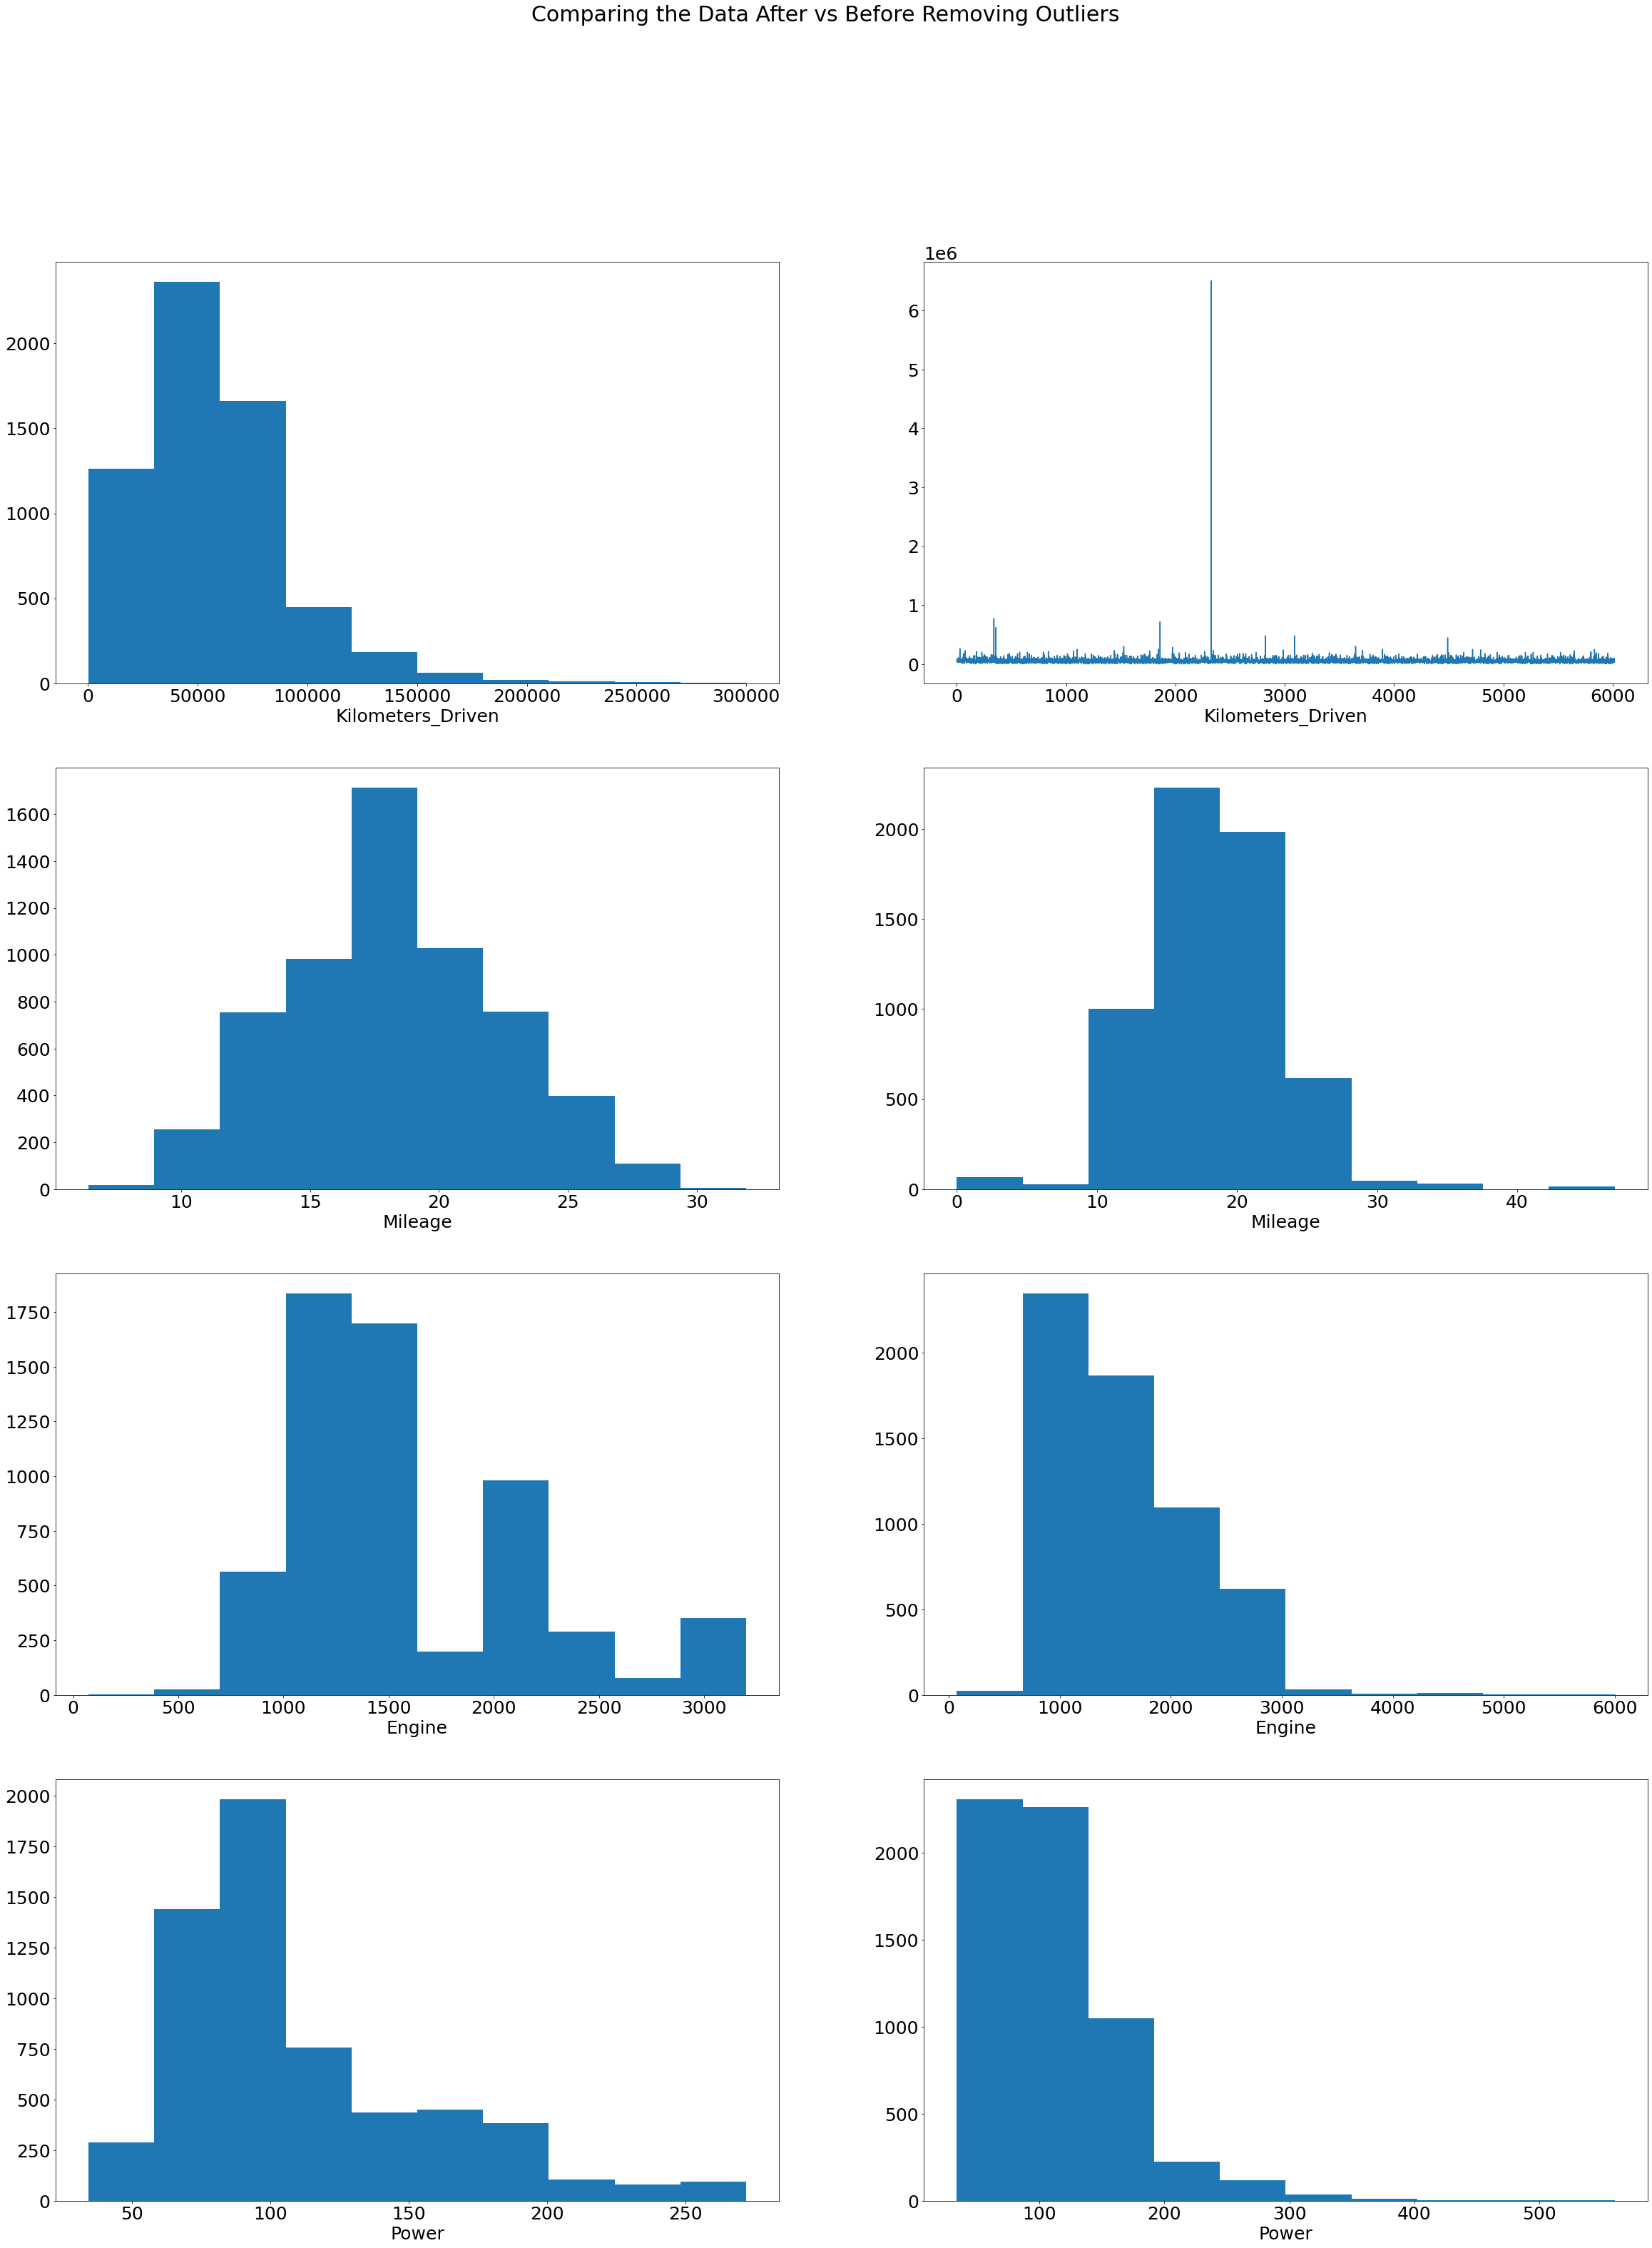

In [332]:
fig, ax = plt.subplots(nrows =4, ncols=2, figsize=(40,50))
fig.suptitle('Comparing the Data After vs Before Removing Outliers')
ax[0, 0].hist(df_copy['Kilometers_Driven'])
ax[0, 1].plot(df['Kilometers_Driven'])
ax[0, 1].set(xlabel= 'Kilometers_Driven')
ax[0, 0].set(xlabel= 'Kilometers_Driven')
ax[1, 0].hist(df_copy['Mileage'])
ax[1, 0].set(xlabel= 'Mileage')
ax[1,1].hist(df['Mileage'])
ax[1, 1].set(xlabel= 'Mileage')
ax[2, 0].hist(df_copy['Engine'])
ax[2, 0].set(xlabel= 'Engine')
ax[2, 1].hist(df['Engine'])
ax[2, 1].set(xlabel= 'Engine')
ax[3, 0].hist(df_copy['Power'])
ax[3, 0].set(xlabel= 'Power')
ax[3, 1].hist(df['Power'])
ax[3, 1].set(xlabel= 'Power');

## Reduce the unique count for Nominal variables like Name and Location

In [334]:
df_copy.Name

0                 Maruti Wagon R LXI CNG
1       Hyundai Creta 1.6 CRDi SX Option
2                           Honda Jazz V
3                      Maruti Ertiga VDI
4        Audi A4 New 2.0 TDI Multitronic
                      ...               
6014                    Maruti Swift VDI
6015            Hyundai Xcent 1.1 CRDi S
6016               Mahindra Xylo D4 BSIV
6017                  Maruti Wagon R VXI
6018               Chevrolet Beat Diesel
Name: Name, Length: 6019, dtype: object

Here we can easily reduce the unique names by replacing the full model name by the comapny's name
For ex:  Maruti Wagon R LXI CNG can become Maruti Wagon

In [335]:
df_copy.Name.value_counts()

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1876, dtype: int64

In [336]:
def process_Name(x):
    return ' '.join(x.split()[0:2])
df_copy['Name'] = df_copy.Name.apply(process_Name)
df_copy.Name

0         Maruti Wagon
1        Hyundai Creta
2           Honda Jazz
3        Maruti Ertiga
4              Audi A4
             ...      
6014      Maruti Swift
6015     Hyundai Xcent
6016     Mahindra Xylo
6017      Maruti Wagon
6018    Chevrolet Beat
Name: Name, Length: 6019, dtype: object

### We have successfully reduced the unique Name count

In [368]:
df.Name.unique().shape,  df_copy.Name.unique().shape

((1876,), (216,))

In [309]:
df.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

Considering the regions of Inida as 
* South : Chennai, Coimbatore, Hyderabad, Kochi , Banglore
* North : Delhi
* North West : Jaipur
* West : Mumbai, Pune, Ahmedabad
* East : Kolkata


In [310]:
df_copy.Location.value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [338]:
def process_location(x):
    if x == 'Mumbai' or x =='Pune' or x == 'Ahmedabad':
        return 'West'
    elif x == 'Chennai' or x== 'Coimbatore' or x=='Kochi' or x=='Hyderabad' or x== 'Banglore':
        return 'South'
    elif x== 'Delhi':
        return 'North'
    elif x =='Kolkata':
        return 'East'
    else:
        return 'North West'

In [339]:
df_copy['Location'] = df_copy.Location.apply(process_location)
df_copy.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon,West,2010,72000.0,CNG,Manual,First,18.19,998.0,58.16,5.0,11.67,1.75
1,Hyundai Creta,West,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,11.67,12.50
2,Honda Jazz,South,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga,South,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.67,6.00
4,Audi A4,South,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,11.67,17.74


In [340]:
df_copy.Location.value_counts()

South         2523
West          1636
North West     771
North          554
East           535
Name: Location, dtype: int64

### Reduced the number of unique locations

In [363]:
df.Location.unique().shape, df_copy.Location.unique().shape

((11,), (5,))

## Look for any anomalies in the dataset and treat it appropriately.

In [369]:
df_temp = df_copy.copy()

In [370]:
df_temp.Owner_Type.value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [371]:
def add_owner(x):
    if x =='First':
        return 1
    elif x =='Second':
        return 2
    elif x =='Third':
        return 3
    else:
        return 4
df_temp['Owner_Count'] = df_temp['Owner_Type'].apply(add_owner)
df_temp.Owner_Count

0       1
1       1
2       1
3       1
4       2
       ..
6014    1
6015    1
6016    2
6017    1
6018    1
Name: Owner_Count, Length: 6019, dtype: int64

## Bi-Variate Analysis and anamoly detection

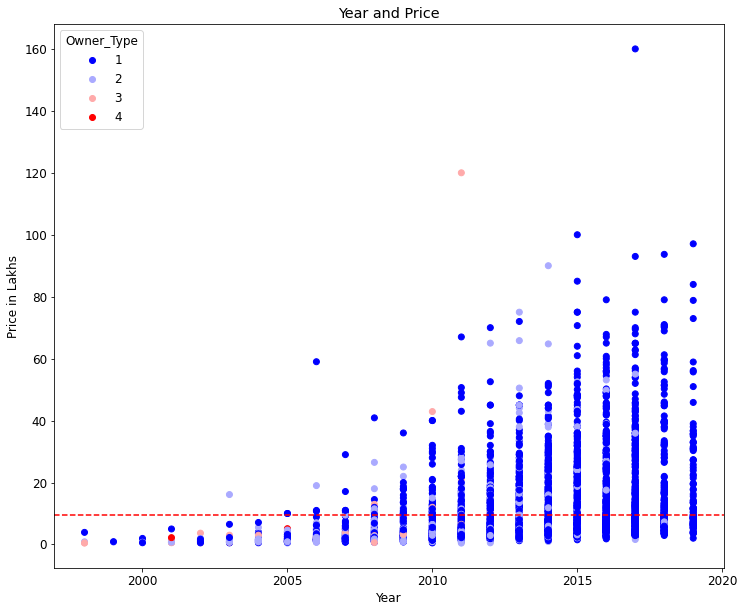

In [372]:
fig, ax = plt.subplots(figsize=(12,10))
scatter = ax.scatter(df_copy['Year'], df_copy['Price'], c = df_temp.Owner_Count, cmap='bwr')
ax.set(title="Year and Price",
        ylabel="Price in Lakhs",
      xlabel="Year")
ax.axhline(y=df_copy['Price'].mean(), 
            color='red', 
            linestyle='--',)
ax.legend(*scatter.legend_elements(), title="Owner_Type");


We can see that the Price always increases with increase in year (considering the year to be the year the model was manufactured), so there is no anomaly present here

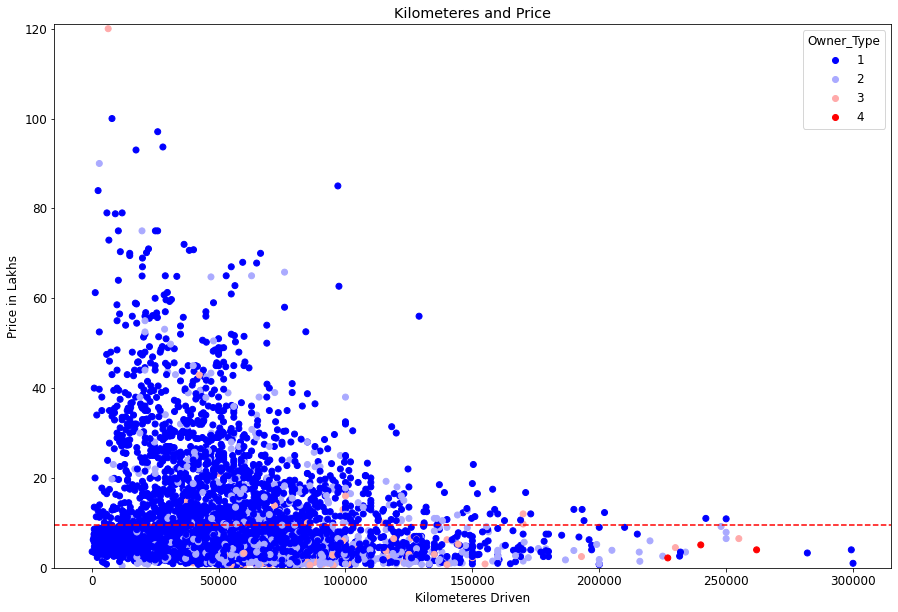

In [373]:
fig, ax = plt.subplots(figsize=(15,10))
scatter=ax.scatter(df_copy['Kilometers_Driven'], df_copy['Price'], c= df_temp.Owner_Count, cmap='bwr')
ax.set(title="Kilometeres and Price",
        ylabel="Price in Lakhs",
      xlabel = "Kilometeres Driven")
ax.set_ylim([0, 121])
ax.axhline(y=df_copy['Price'].mean(), 
            color='red', 
            linestyle='--',)
ax.legend(*scatter.legend_elements(), title="Owner_Type");

The Price decreased with Kilometeres Driven as expected, also there are hardly any 4 (or above) owners above the mean price of the cars

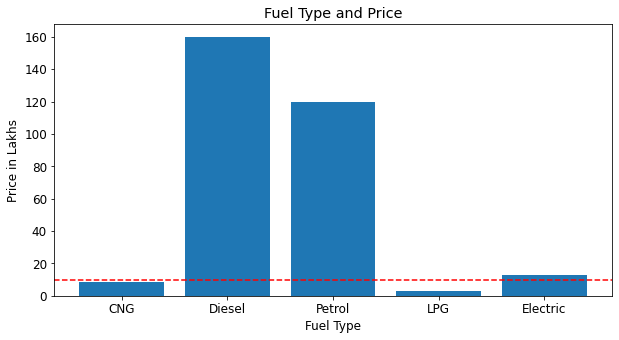

In [381]:
fig, ax = plt.subplots(figsize=(10,5))
scatter=ax.bar(df_copy['Fuel_Type'], df_copy['Price'])
ax.set(title="Fuel Type and Price",
        ylabel="Price in Lakhs",
      xlabel = "Fuel Type")
#ax.set_ylim([0, 121])
ax.axhline(y=df_copy['Price'].mean(), 
            color='red', 
            linestyle='--',)


In [383]:
df_x = df_temp.copy()
def add_fuel(x):
    if x =='CNG':
        return 1
    elif x =='Diesel':
        return 2
    elif x =='Petrol':
        return 3
    elif x =='LPG':
        return 5
    else:
        return 6
df_temp['Fuel_Code'] = df_temp['Fuel_Type'].apply(add_fuel)
df_temp.Fuel_Code

0       1
1       2
2       3
3       2
4       2
       ..
6014    2
6015    2
6016    2
6017    3
6018    2
Name: Fuel_Code, Length: 6019, dtype: int64

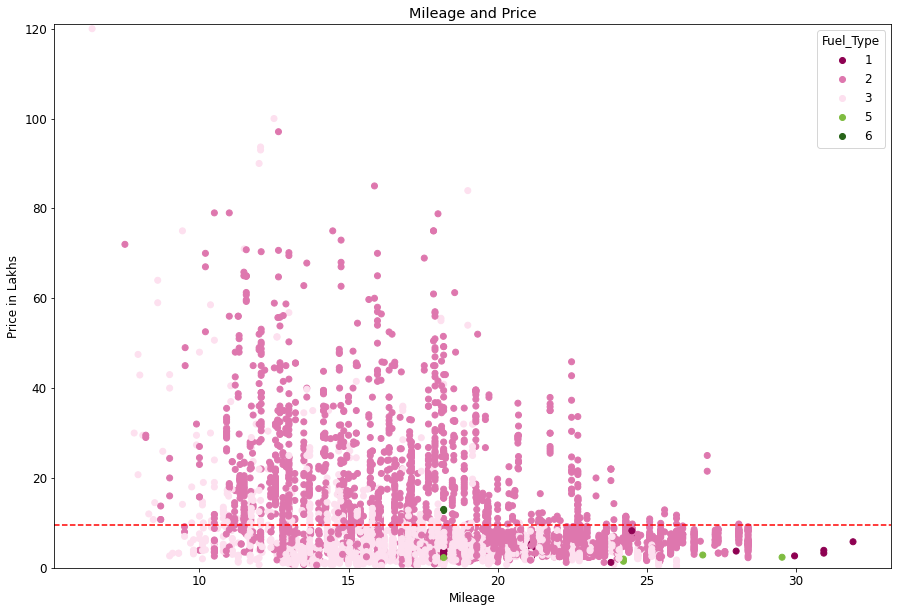

In [386]:
fig, ax = plt.subplots(figsize=(15,10))
scatter=ax.scatter(df_copy['Mileage'], df_copy['Price'], c= df_temp.Fuel_Code, cmap='PiYG')
ax.set(title="Mileage and Price",
        ylabel="Price in Lakhs",
      xlabel = "Mileage")
ax.set_ylim([0, 121])
ax.axhline(y=df_copy['Price'].mean(), 
            color='red', 
            linestyle='--',)
ax.legend(*scatter.legend_elements(), title="Fuel_Type");

Highest Price for the cars are for mileage between 10-15 most of which are petrol and diesel driven cars

## Encoding the categorical variables appropriately

### Encoding the categorical variables using Pandas

In [97]:
cat_col = []
for label, content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
        cat_col.append(label)

Name
Location
Fuel_Type
Transmission
Owner_Type


In [98]:
for cati in cat_col:
    df_copy[cati] = df_copy[cati].astype("category")
    df_copy[cati] = df_copy[cati].cat.codes
df_copy.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,126,4,2010,72000.0,0,1,0,18.19,998.0,58.16,5.0,NaN,1.75
1,65,4,2015,41000.0,1,1,0,19.67,1582.0,126.20,5.0,NaN,12.50
2,60,3,2011,46000.0,4,1,0,18.20,1199.0,88.70,5.0,NaN,4.50
3,113,3,2012,87000.0,1,1,0,20.77,1248.0,88.76,7.0,NaN,6.00
4,2,3,2013,40670.0,1,0,2,15.20,1968.0,140.80,5.0,NaN,17.74


### We have successfully encoded out categorical features to numeric data

### Encoding without using any libraries, just use loops and conditionals

In [388]:
df_temp.drop('Owner_Count', axis=1, inplace=True)
df_temp.drop('Fuel_Code', axis=1, inplace=True)
df_temp

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon,West,2010,72000.0,CNG,Manual,First,18.19,998.0,58.16,5.0,11.67,1.75
1,Hyundai Creta,West,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,11.67,12.50
2,Honda Jazz,South,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga,South,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.67,6.00
4,Audi A4,South,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,11.67,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift,North,2014,27365.0,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88,4.75
6015,Hyundai Xcent,North West,2015,100000.0,Diesel,Manual,First,24.40,1120.0,71.00,5.0,11.67,4.00
6016,Mahindra Xylo,North West,2012,55000.0,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,11.67,2.90
6017,Maruti Wagon,East,2013,46000.0,Petrol,Manual,First,18.90,998.0,67.10,5.0,11.67,2.65


In [100]:
def get_cat_dict(x):
    cat_dict = {}
    x = df_temp[x].unique()
    i = 0
    for category in x:
        cat_dict[category] = i
        i+=1
    return cat_dict        

In [101]:
print(get_cat_dict('Fuel_Type'))

{'CNG': 0, 'Diesel': 1, 'Petrol': 2, 'LPG': 3, 'Electric': 4}


In [102]:
for category in cat_col:
    cat_dict = get_cat_dict(category)
    df_temp[category] = df_temp[category].apply(lambda x : cat_dict[x])
df_temp

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,0,2010,72000.0,0,0,0,18.19,998.0,58.16,5.0,NaN,1.75
1,1,0,2015,41000.0,1,0,0,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,1,2011,46000.0,2,0,0,18.20,1199.0,88.70,5.0,NaN,4.50
3,3,1,2012,87000.0,1,0,0,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,1,2013,40670.0,1,1,1,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,12,4,2014,27365.0,1,0,0,28.40,1248.0,74.00,5.0,NaN,4.75
6015,32,2,2015,100000.0,1,0,0,24.40,1120.0,71.00,5.0,NaN,4.00
6016,135,2,2012,55000.0,1,0,1,14.00,2498.0,112.00,8.0,NaN,2.90
6017,0,3,2013,46000.0,2,0,0,18.90,998.0,67.10,5.0,NaN,2.65


### Encoded categorical data without libraries

## On New_Price variable:
Compare the Distribution of data before and after imputation (without using any standard ML libraries)
Using the two parameters of Gaussian Distribution : 
* Mean 
* Standard Deviation

In [103]:
df_original = pd.read_csv("data/train-data.csv")
df_original['New_Price'] = df_original.New_Price.apply(process_New_Price)
df_original.New_Price

0        NaN
1        NaN
2       8.61
3        NaN
4        NaN
        ... 
6014    7.88
6015     NaN
6016     NaN
6017     NaN
6018     NaN
Name: New_Price, Length: 6019, dtype: float64

In [198]:
s = df_original['New_Price']
s.dtype

dtype('float64')

### Calculating mean without ML libraries

In [199]:
s = np.array(s)
sum = 0
len_na = 0
for x in s:
    if x==x:
        sum = sum + x
        len_na = len_na + 1
sum, len_na

(19014.339999999993, 824)

In [192]:
old_mean = sum/len_na
old_mean

23.075655339805817

In [186]:
total_sum = 0
count = 0
for x in df['New_Price']:
    total_sum+=x
    count+=1
total_sum, count

(79639.98999999274, 6019)

In [188]:
new_mean = total_sum/count
new_mean

13.231432131582114

### Calculating standard deviation withou ML libraries
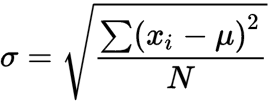

In [ ]:
import math

In [203]:
std_sum = 0
len_na = 0
for x in s:
    if x==x:
        diff = (x-old_mean)**2
        std_sum = std_sum + diff
        len_na+=1
    
std_sum, len_na

(564181.8862461171, 824)

In [210]:
temp = []
for x in s:
    if x==x:
        temp.append(x)

In [206]:
old_std = math.sqrt(std_sum/len_na)
old_std

26.166519737119316

In [207]:
total_sum_std = 0
count = 0
for x in df['New_Price']:
    diff = (x- new_mean)**2
    total_sum_std+=diff 
    count+=1
total_sum_std, count

(656700.4554550694, 6019)

In [209]:
new_std = math.sqrt(total_sum_std/count)
new_std

10.445313689813055

In [229]:
data = [[old_mean, new_mean], [old_std, new_std]]

In [236]:
plot_data = pd.DataFrame(data=data, columns=['old','new'], index = ['Mean', 'Standard Deviation'])
plot_data

,old,new
Mean,13.231432,10.445314
Standard Deviation,23.075655,26.166520


<AxesSubplot:>

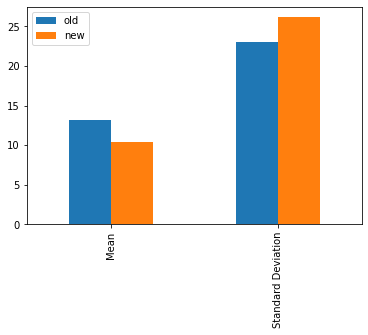

In [237]:
plot_data.plot(kind='bar')